<a href="https://www.kaggle.com/code/piyushkumar2424/iris-voting-classifier?scriptVersionId=200296155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
iris=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

# Encoding the species column:-

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
iris["species"]=le.fit_transform(iris["species"])

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Since rows are in sorted order based on o/p column .so lets suffle the rows:

In [7]:
iris = iris.sample(frac=1).reset_index(drop=True)

In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.1,2
1,5.0,3.4,1.5,0.2,0
2,5.5,2.4,3.8,1.1,1
3,6.8,2.8,4.8,1.4,1
4,6.3,2.5,4.9,1.5,1
...,...,...,...,...,...
145,5.0,3.5,1.6,0.6,0
146,7.2,3.2,6.0,1.8,2
147,5.7,2.8,4.1,1.3,1
148,7.3,2.9,6.3,1.8,2


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
is_inf = np.isinf(iris)
print(is_inf.sum()) 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


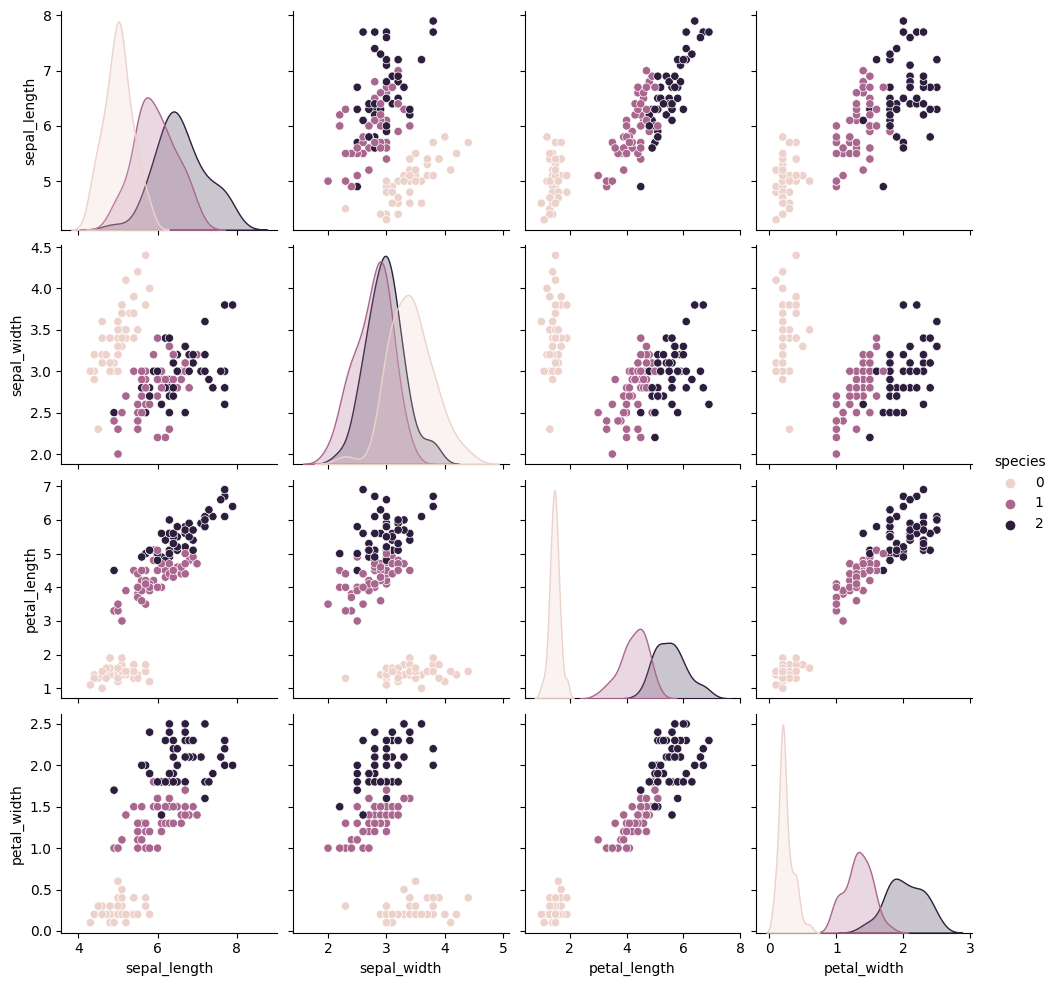

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
sns.pairplot(data=iris,hue="species")

# since we are using voting classifier (Ensemle learning) so lets apply it on making the iris dataset complex to clssify by using only ("sepal length" and "sepal width ") columns and except IRIS-setosa(0) class :-

In [12]:
iris_new=iris[iris['species']!=0][["sepal_length","sepal_width",'species']]
iris_new

,sepal_length,sepal_width,species
0,6.4,2.8,2
2,5.5,2.4,1
3,6.8,2.8,1
4,6.3,2.5,1
5,6.1,3.0,2
...,...,...,...
143,5.0,2.0,1
146,7.2,3.2,2
147,5.7,2.8,1
148,7.3,2.9,2


# splitting the data into i/p and o/p columns:-

In [13]:
X=iris.iloc[:,0:2]   #i/p columns
Y=iris.iloc[:,-1]    #o/p column

In [14]:
X

,sepal_length,sepal_width
0,6.4,2.8
1,5.0,3.4
2,5.5,2.4
3,6.8,2.8
4,6.3,2.5
...,...,...
145,5.0,3.5
146,7.2,3.2
147,5.7,2.8
148,7.3,2.9


In [15]:
Y

0      2
1      0
2      1
3      1
4      1
      ..
145    0
146    2
147    1
148    2
149    2
Name: species, Length: 150, dtype: int64

# importing the different classifiers:-

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [17]:
LRC=LogisticRegression()
KNC=KNeighborsClassifier()
RFC=RandomForestClassifier()

In [18]:
estimators=[('lr',LRC),('knn',KNC),('rf',RFC)]

In [19]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,Y,scoring='accuracy')
    print(estimator[1],'--',np.round(np.mean(x),2))

LogisticRegression() -- 0.81
KNeighborsClassifier() -- 0.77
RandomForestClassifier() -- 0.75


In [20]:
from sklearn.ensemble import VotingClassifier

# Hard Voting:

In [21]:
vc1 = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


# soft votting:

In [22]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,Y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


# weighted voitng:

In [23]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,Y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.75
for i=1,j=1,k=2 0.76
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.75
for i=1,j=2,k=2 0.73
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.76
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.75
for i=2,j=1,k=3 0.75
for i=2,j=2,k=1 0.76
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.75
for i=2,j=3,k=1 0.77
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.76
for i=3,j=2,k=1 0.78
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.75
for i=3,j=3,k=1 0.77
for i=3,j=3,k=2 0.75
for i=3,j=3,k=3 0.75


# Classifiers of Same Algorithm :

In [24]:
from sklearn.svm import SVC

In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

In [26]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [27]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


In [28]:
print("Thank you !!!")

Thank you !!!
